In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
x1 = np.random.standard_normal((100,2))-2
x2 = np.random.standard_normal((100,2))+8
x3 = np.random.standard_normal((100,2))+5
x4 = np.random.standard_normal((100,2))+12
X = np.concatenate((x1,x2,x3,x4),axis=0)
Data = pd.DataFrame(X,columns=['A', 'B'])
Data.to_csv('kmeans1.csv',index=None)

In [51]:
import pandas as pd
X = pd.read_table('kmeans1.csv', delimiter =',')
X

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


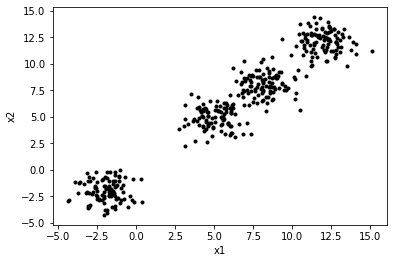

In [52]:
plt.plot(X['A'],X['B'],'k.')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [53]:
from sklearn.cluster import KMeans
k_means_2 = KMeans(n_clusters=4)
k_means_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

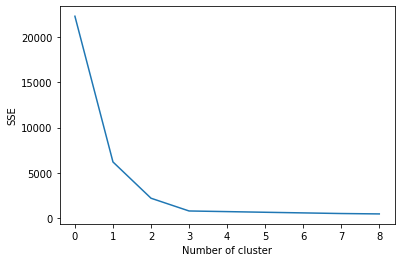

In [63]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [54]:
k_means_2.cluster_centers_

array([[ 8.20621583,  8.08967922],
       [-1.92438992, -1.96702231],
       [11.98408224, 12.13107349],
       [ 5.06877653,  4.95259781]])

In [64]:
k_means_2.inertia_

789.0012783558575

In [55]:
k_means_2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2,

In [56]:
X['clase'] = k_means_2.labels_

In [57]:
X

,A,B,clase
0,-3.032505,-3.367918,1
1,-2.603797,-1.616394,1
2,-1.357223,-0.199628,1
3,-2.992206,-3.523316,1
4,-1.708192,-1.007209,1
...,...,...,...
395,11.387093,11.833448,2
396,10.228298,11.730811,2
397,11.256921,12.703525,2
398,11.142780,11.767086,2


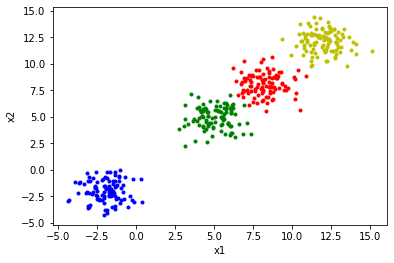

In [58]:
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(X['A'][X['clase']==i],X['B'][X['clase']==i],colores[i], label='cluster 0')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [59]:

k_means_3 = KMeans(n_clusters=3)
k_means_3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

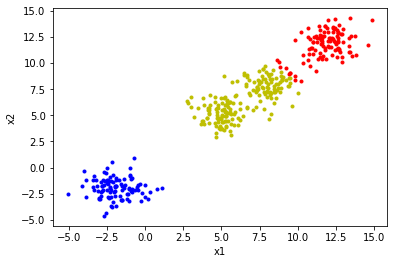

In [18]:
plt.plot(X[k_means_3.labels_==0,0],X[k_means_3.labels_==0,1],'r.', label='cluster 1')
plt.plot(X[k_means_3.labels_==1,0],X[k_means_3.labels_==1,1],'b.', label='cluster 2')
plt.plot(X[k_means_3.labels_==2,0],X[k_means_3.labels_==2,1],'y.', label='cluster 3')
plt.ylabel('x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [9]:
k_means_4 = KMeans(n_clusters=4)
k_means_4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

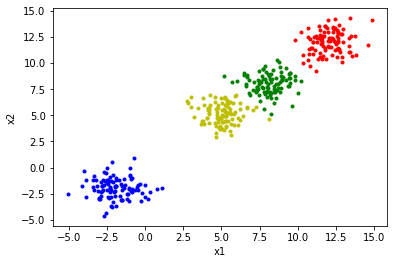

In [19]:
plt.plot(X[k_means_4.labels_==0,0],X[k_means_4.labels_==0,1],'r.', label='cluster 1')
plt.plot(X[k_means_4.labels_==1,0],X[k_means_4.labels_==1,1],'b.', label='cluster 2')
plt.plot(X[k_means_4.labels_==2,0],X[k_means_4.labels_==2,1],'y.', label='cluster 3')
plt.plot(X[k_means_4.labels_==3,0],X[k_means_4.labels_==3,1],'g.', label='cluster 3')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()